In [1]:
#Data Exploration -

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_bookings = pd.read_csv("C:/Users/hp/Projects/Hotel Data Analytics/datasets/fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [3]:
df_bookings.shape()

TypeError: 'tuple' object is not callable

In [4]:
df.shape()

NameError: name 'df' is not defined

In [9]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [7]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

In [8]:
df_bookings.booking_platform.value_counts.plot()

AttributeError: 'function' object has no attribute 'plot'

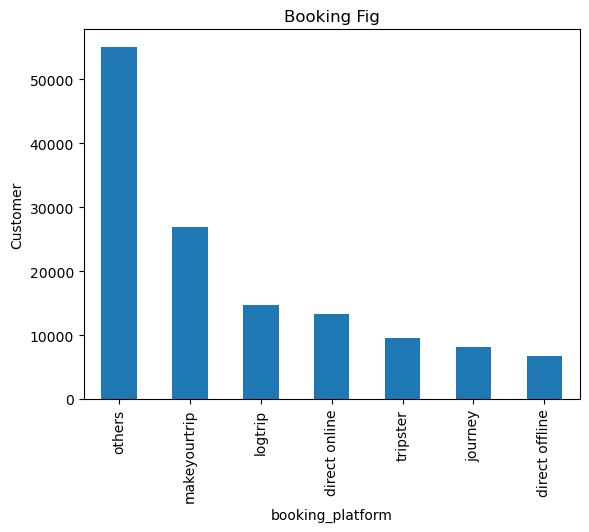

In [18]:
plt.ylabel('Customer')
plt.title('Booking Fig')
plt.grid()
df_bookings.booking_platform.value_counts().plot(kind="bar")
plt.show()

In [2]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [3]:
df_bookings.shape

(134590, 12)

In [4]:
df_dates = pd.read_csv("C:/Users/hp/Projects/Hotel Data Analytics/datasets/dim_date.csv")
df_hotel = pd.read_csv("C:/Users/hp/Projects/Hotel Data Analytics/datasets/dim_hotels.csv")
df_rooms = pd.read_csv("C:/Users/hp/Projects/Hotel Data Analytics/datasets/dim_rooms.csv")
df_agg = pd.read_csv("C:/Users/hp/Projects/Hotel Data Analytics/datasets/fact_aggregated_bookings.csv")

In [5]:
df_dates
df_hotel
df_rooms
df_agg

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [16]:
#Data Cleaning - 

df_bookings
df_bookings[df_bookings.no_guests<=0] #No. of Guests have Negative Values
df_bookings = df_bookings[df_bookings.no_guests>0] #Here we have get rid of guests who contains negative values.
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [17]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max() #It is giving some error which is outlayer 

(6500, 28560000)

In [19]:
#To Remove we have use 3 standard Deviation Method

avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg, std

(15378.036937686695, 93040.15493143328)

In [20]:
higher_limit = avg + 3*std
higher_limit # means outlier

294498.50173198653

In [21]:
lower_limit = avg - 3*std
lower_limit # revenue can't be negative

-263742.4278566132

In [26]:
#Lets check how many negative values we have in revenue

df_bookings[df_bookings.revenue_generated<0]

#let Check on Higher Limit

df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [28]:
#Removing outliers by Reversing higher limit condition 

df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [31]:
#Handling na values -

df_bookings.isnull() # is null give True values where value is NA and False Where it is not
df_bookings.isnull().sum() # Gives the number of values particular colum contains null value


booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [34]:
df_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [37]:
25/30 # Occupancy Percentage 

#Occupancy % = Succesful booking / Capacity

0.8333333333333334

In [13]:
df_agg["Occ_Pct"] = df_agg["successful_bookings"]/df_agg["capacity"]
df_agg

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [15]:
# Methods to Print Percentage correct

df_agg["Occ_Pct"] = df_agg["Occ_Pct"].apply(lambda x: round(x*100,2))


In [16]:
df_agg

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Pct
0,16559,1-May-22,RT1,25,30.0,8333.0
1,19562,1-May-22,RT1,28,30.0,9333.0
2,19563,1-May-22,RT1,23,30.0,7667.0
3,17558,1-May-22,RT1,30,19.0,15789.0
4,16558,1-May-22,RT1,18,19.0,9474.0
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,7222.0
9196,16559,31-Jul-22,RT4,13,18.0,7222.0
9197,17558,31-Jul-22,RT4,3,6.0,5000.0
9198,19563,31-Jul-22,RT4,3,6.0,5000.0


In [41]:
# Insights Generation -

In [17]:
# What is the avg occupancy rate in each of the room category -

df_agg.groupby("room_category")["Occ_Pct"].mean().round(2)

room_category
RT1    5822.42
RT2    5804.03
RT3    5802.82
RT4    5930.05
Name: Occ_Pct, dtype: float64

In [21]:
df = pd.merge(df_agg, df_rooms, left_on = "room_category", right_on = "room_id")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,8333.0,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,9333.0,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,7667.0,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,15789.0,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,9474.0,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,7222.0,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,7222.0,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,5000.0,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,5000.0,RT4,Presidential


In [22]:
df.groupby("room_class")["Occ_Pct"].mean().round(2)

room_class
Elite           5804.03
Premium         5802.82
Presidential    5930.05
Standard        5822.42
Name: Occ_Pct, dtype: float64

In [23]:
df.drop("room_id", axis = 1, inplace = True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Pct,room_class
0,16559,1-May-22,RT1,25,30.0,8333.0,Standard
1,19562,1-May-22,RT1,28,30.0,9333.0,Standard
2,19563,1-May-22,RT1,23,30.0,7667.0,Standard
3,17558,1-May-22,RT1,30,19.0,15789.0,Standard


In [24]:
# Print avg occupancy rate per city -

df_hotel

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [25]:
df = pd.merge(df,df_hotel, on = "property_id")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,8333.0,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,6667.0,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,5667.0,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,7000.0,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,5333.0,Standard,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9195,18560,27-Jul-22,RT4,6,15.0,4000.0,Presidential,Atliq City,Business,Hyderabad
9196,18560,28-Jul-22,RT4,9,15.0,6000.0,Presidential,Atliq City,Business,Hyderabad
9197,18560,29-Jul-22,RT4,8,15.0,5333.0,Presidential,Atliq City,Business,Hyderabad
9198,18560,30-Jul-22,RT4,9,15.0,6000.0,Presidential,Atliq City,Business,Hyderabad


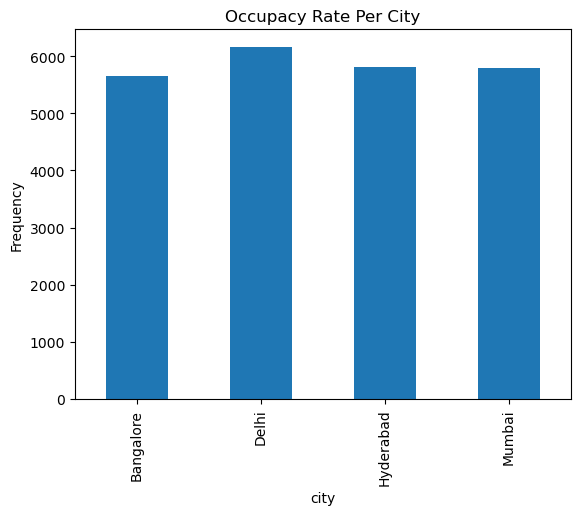

In [26]:
df.groupby("city")["Occ_Pct"].mean().round(2).plot(kind="bar")
plt.ylabel('Frequency')
plt.title('Occupacy Rate Per City')
plt.show()


In [27]:
# When was the Occupancy better? Weekdays or Weekends? 

df_dates

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [28]:
df = pd.merge(df, df_dates, left_on = "check_in_date", right_on = "date")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,6000.0,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,6098.0,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,6250.0,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,7222.0,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,6000.0,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,17564,31-Jul-22,RT4,10,17.0,5882.0,Presidential,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6496,18560,31-Jul-22,RT1,22,30.0,7333.0,Standard,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6497,18560,31-Jul-22,RT2,34,40.0,8500.0,Elite,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6498,18560,31-Jul-22,RT3,17,24.0,7083.0,Premium,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend


In [29]:
df.groupby("day_type")["Occ_Pct"].mean().round(2)

day_type
weekeday    5090.38
weekend     7239.34
Name: Occ_Pct, dtype: float64

In [31]:
df.drop("date", axis = 1, inplace = True)

KeyError: "['date'] not found in axis"

NameError: name 'df' is not defined

In [32]:
# In the Month of June what is the occupancy for different cities -

df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [36]:
df_jun_22 = df[df["mmm yy"]=="Jun 22"]
df_jun_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Pct,room_class,property_name,category,city,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,6667.0,Standard,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,6341.0,Elite,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,6250.0,Premium,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,6111.0,Presidential,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday


In [48]:
df_jun_22.groupby("city")["Occ_Pct"].mean().round(2).sort_values(ascending=False)


city
Delhi        6247.43
Hyderabad    5845.81
Mumbai       5838.26
Bangalore    5657.86
Name: Occ_Pct, dtype: float64

In [49]:
df_august = pd.read_csv("C:/Users/hp/Projects/Hotel Data Analytics/datasets/new_data_august.csv")
df_august

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [51]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [52]:
df_august.shape

(7, 13)

In [53]:
df.shape

(6500, 13)

In [54]:
latest_df = pd.concat([df, df_august], ignore_index=True, axis=0)
latest_df

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Pct,room_class,property_name,category,city,mmm yy,week no,day_type,occ%
0,16559,10-May-22,RT1,18,30.0,6000.0,Standard,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday,NaN
1,16559,10-May-22,RT2,25,41.0,6098.0,Elite,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday,NaN
2,16559,10-May-22,RT3,20,32.0,6250.0,Premium,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday,NaN
3,16559,10-May-22,RT4,13,18.0,7222.0,Presidential,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday,NaN
4,19562,10-May-22,RT1,18,30.0,6000.0,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday,69.23


In [55]:
latest_df.shape

(6507, 14)

In [57]:
# Print Revenue Realized per city?

df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [60]:
df_hotel.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [61]:
df_bookings_all = pd.merge(df_bookings, df_hotel, on="property_id")
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


<Axes: xlabel='city'>

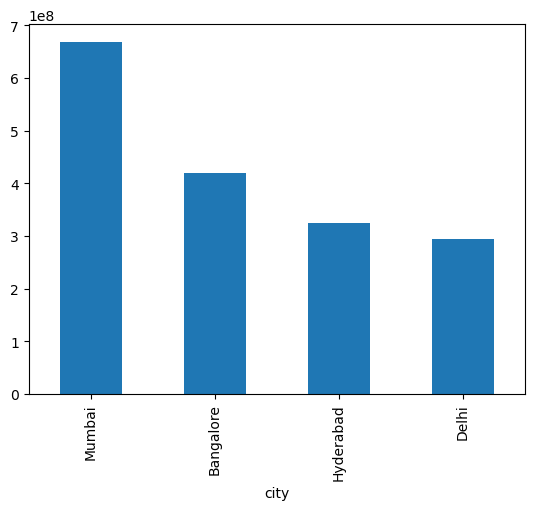

In [64]:
df_bookings_all.groupby("city")["revenue_realized"].sum().sort_values(ascending=False).plot(kind="bar")

In [81]:
# Print Month by Month Revenue ?

df_bookings_all.head(4)
df_dates.head(4)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday


In [67]:
df_bookings_date = pd.merge(df_bookings_all, df_dates, left_on="check_in_date", right_on="date")
df_bookings_date

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [68]:
df_dates["date"] = pd.to_datetime(df_dates["date"])
df_dates.head(4)

C:\Users\hp\AppData\Local\Temp\ipykernel_268\2972853715.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dates["date"] = pd.to_datetime(df_dates["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday


In [69]:
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [79]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

ValueError: time data "13-05-22" doesn't match format "%m/%d/%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [72]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

ValueError: time data "13-05-22" doesn't match format "%m/%d/%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [73]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
 12  property_name      134590 non-null  object 
 13  category           134590 non-null  object 
 14  city               134590 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [80]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"],infer_datetime_format=True)                                                 

df_bookings_all                                                 

C:\Users\hp\AppData\Local\Temp\ipykernel_268\3964588656.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"],infer_datetime_format=True)


ValueError: time data "13-05-22" doesn't match format "%m/%d/%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [82]:
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [83]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])


ValueError: time data "13-05-22" doesn't match format "%m/%d/%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'check_in_date'. If you wish to proceed you should use pd.concat